# NLP Sentiment Analysis on Restaurant Reviews

## Overview
* This project is a simple implementation of NLP Sentiment Analysis on Restaurant Reviews.
* The dataset contains 10417 reviews of a restaurant. 
* The goal is to predict whether a review is positive or negative. 
* The dataset downloaded from yelp.com website.

## Data Dictionary
* index: Index of the review
* review_id: Unique id of the review
* user_id: Unique id of the user
* business_id: Unique id of the business
* stars: Rating of the review
* useful: Number of useful votes
* funny: Number of funny votes
* cool: Number of cool votes
* text: Review text
* date: Date and time of the review

## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [8]:
df = pd.read_csv('restaurant.csv')
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


## EDA - Exploratory Data Analysis

In [10]:
print("Shaping the dataset")
df.shape

Shaping the dataset


(10417, 10)

In [11]:
print("Checking the columns information of the dataset")
df.info()

Checking the columns information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [12]:
print("Viewing the random 5 rows of the dataset")
df.sample(5)

Viewing the random 5 rows of the dataset


,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3640,2642922,6JcovVmPKgO8lyM0sPKNVw,8XKSiMpMxgdwI3qjuqmXFg,RESDUcs7fIiihp38-d6_6g,4,8,6,4,I almost feel like my review can't be consider...,2016-09-26 02:48:36
9034,3095263,KtwrNOkcgT9ILU1HwsNZ5w,ni6VzOOODLa8bCzF0VgkwA,RESDUcs7fIiihp38-d6_6g,3,0,0,0,I've lived in Vegas for 18yrs and have been to...,2019-02-04 06:15:02
4062,2677031,oUvlVJz0zxR7s2F3scWqGg,s2q7QsthX5TfcC-58biJeg,RESDUcs7fIiihp38-d6_6g,3,0,0,0,Service is good. Food is not great..king crab ...,2015-08-24 01:15:56
4194,2685895,_g2nRPCq2JwB2mXhpl002Q,pjfj-AsvK4fd4KNgabYehw,RESDUcs7fIiihp38-d6_6g,2,0,0,0,Very disappointed! For the price of $55 per pe...,2016-07-09 06:28:41
9942,3178015,wPF2oxLaPyGymtsvL2x1Ig,83BeekC9l73tAcmhqlDP1w,RESDUcs7fIiihp38-d6_6g,3,12,7,7,"While the variety of offerings was excellent, ...",2019-10-17 16:04:05


In [13]:
print("Descriptive statistics of the dataset")
df.describe()

Descriptive statistics of the dataset


,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [14]:
print("Checking the unique values in the dataset")
df.nunique()

Checking the unique values in the dataset


Unnamed: 0     10417
review_id      10417
user_id        10129
business_id        1
stars              5
useful            57
funny             43
cool              47
text           10393
date           10417
dtype: int64

In [108]:
# df.useful.value_counts().sort_index(ascending=False)
# df.funny.value_counts().sort_index(ascending=False)
# df.cool.value_counts().sort_index(ascending=False)

In [16]:
print("Checking the missing values in the dataset")
df.isnull().sum()
print("There is no missing value in the dataset")

Checking the missing values in the dataset
There is no missing value in the dataset


## Data Visualization

Visualizing the distribution of the stars


<Axes: xlabel='stars'>

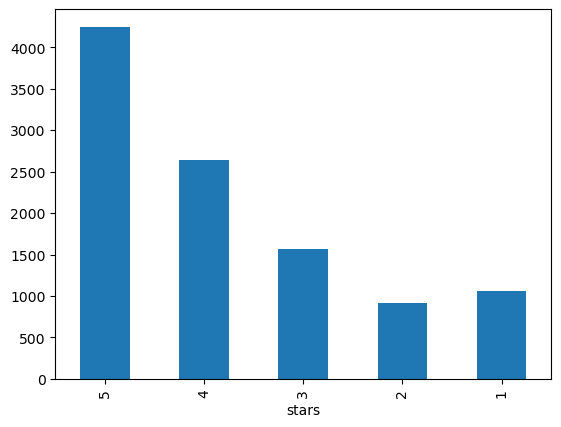

In [18]:
print("Visualizing the distribution of the stars")
df.stars.value_counts().sort_index(ascending=False).plot(kind='bar')

## Data Conversion
The date column is in object format. We need to convert it into datetime format.

In [20]:
print("Converting the date column into datetime format")
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


Converting the date column into datetime format


Visualizing the distribution of the year


<Axes: xlabel='year'>

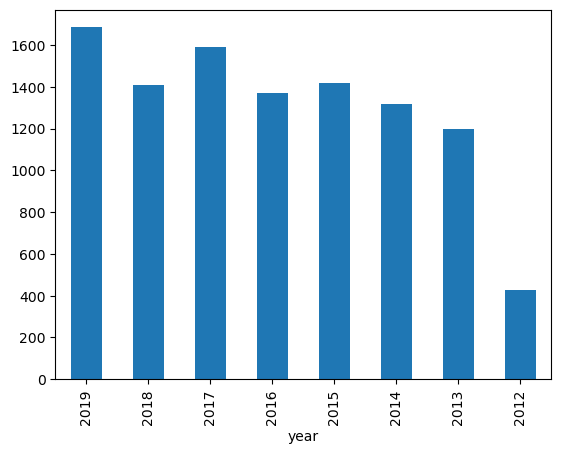

In [21]:
print("Visualizing the distribution of the year")
df.year.value_counts().sort_index(ascending=False).plot(kind='bar')

## Text Processing
The text column contains the reviews. We need to clean the text data before applying any machine learning model.

* Lowercasing the text
* Removing the punctuations, like . , ; ! ? " ' < > / \ | ( ) [ ] { } @ # $ % ^ & * - _ = +
* Removing the stopwords, like a, an, the, this, that, is, are, was, were, etc.
* Removing the digits, like 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
* Removing the enter character, tabs, and new line character

In [23]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\t', '', text)
    text = re.sub(r'\r', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cevheri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cevheri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cevheri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [112]:
df.clean_text.head()

0    getting food poisoning palms hotel scared eat ...
1    feast worthy godsbaccarnal buffet caesar palac...
2    crab legs better ones wicked spoon huge prawns...
3    worth salty food expensive furst kast visit bu...
4    would give infinite stars could family diamond...
Name: clean_text, dtype: object

## Remove unnecessary columns
Removing the unnecessary columns from the dataset for the sentiment analysis.
Model will be trained on the clean_text column.

In [114]:
df = df[['clean_text', 'stars', 'text']]

## World Cloud

In [28]:
from wordcloud import WordCloud

def show_wordcloud(data, title = None, background_color = 'white'):
    wordcloud = WordCloud(
        background_color = background_color,
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3) 
    plt.imshow(wordcloud)
    plt.show()


## Word Cloud for Positive Reviews

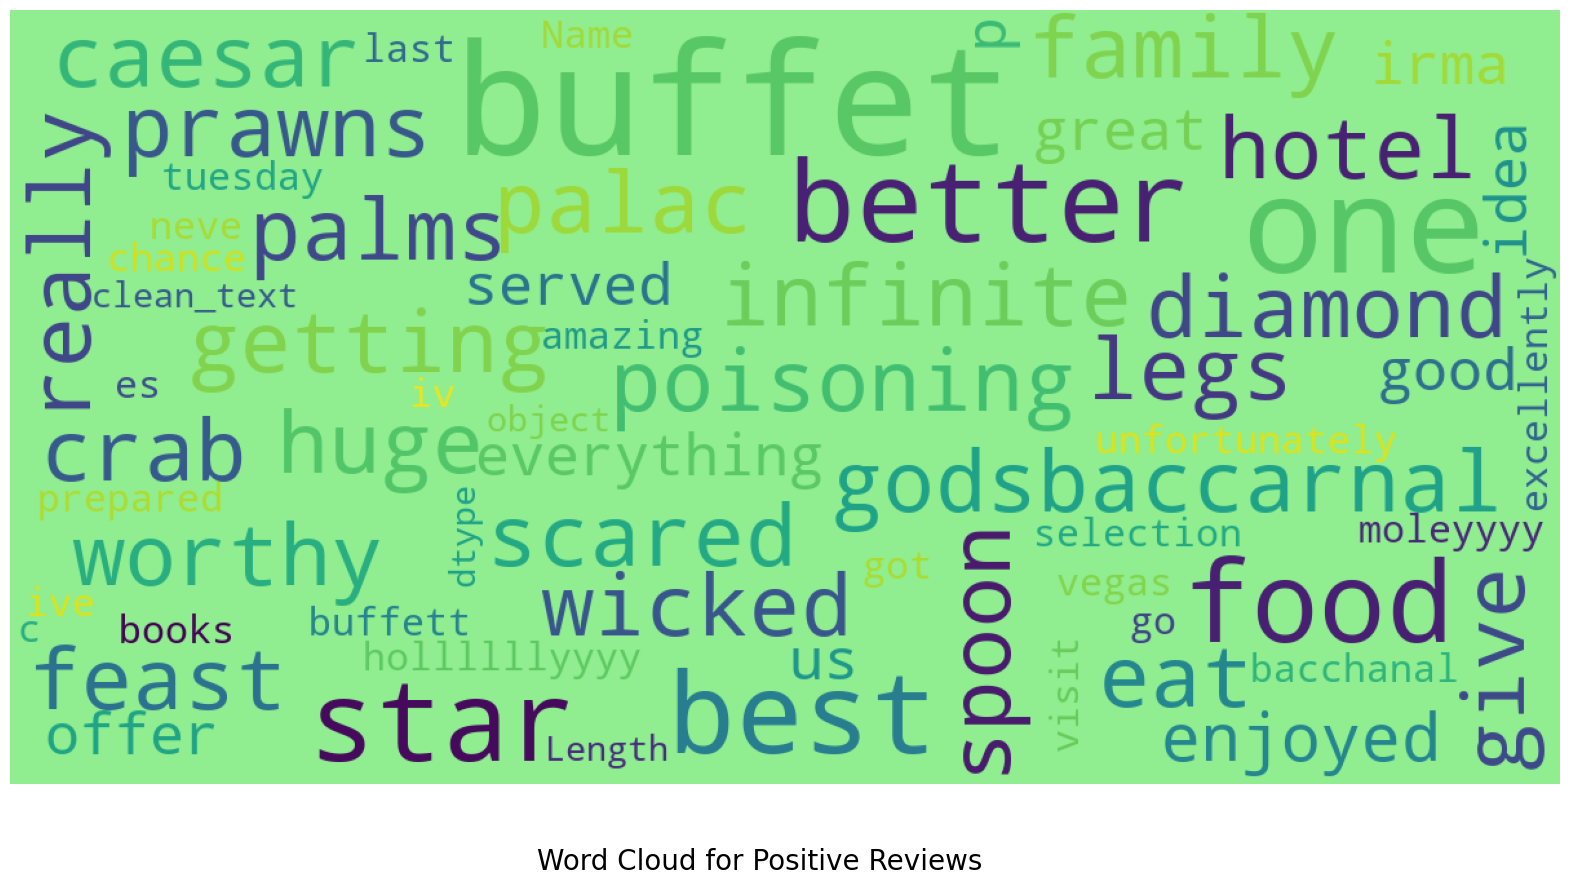

In [30]:
show_wordcloud(df[df['stars'] > 3]['clean_text'], title='Word Cloud for Positive Reviews', background_color='lightgreen')

## Word Cloud for Negative Reviews

Word Cloud for Negative Reviews


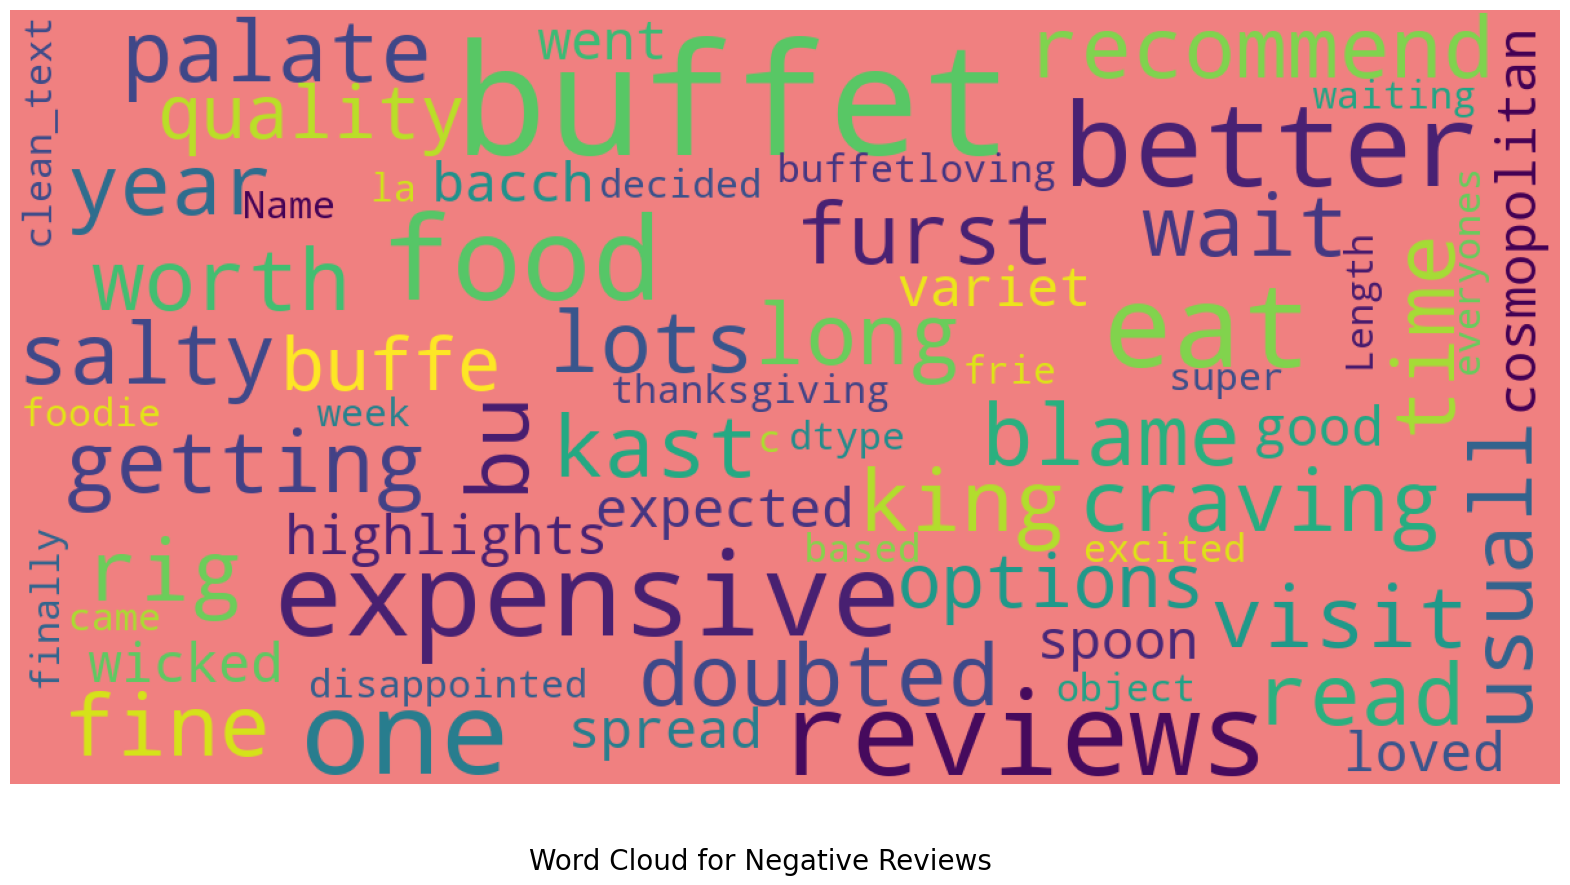

In [32]:
print("Word Cloud for Negative Reviews")
show_wordcloud(df[df['stars'] <= 3]['clean_text'], background_color='lightcoral' , title='Word Cloud for Negative Reviews')

## Data Preprocessing

* Splitting the dataset into training and testing sets.
* Applying CountVectorizer to convert the text data into numerical format.
* Applying TF-IDF to convert the text data into numerical format.
* Applying LabelEncoder to convert the target variable into numerical format.
* Applying train_test_split to split the dataset.
* Applying the machine learning model.
* Checking the accuracy, confusion matrix, classification report.


* Importing the necessary libraries for the data preprocessing.
* Generate X and y variables.
  * X: Independent variable
  * y: Target variable

## Set target variable

In [35]:
print("Setting the target variable")
df['sentiment'] = df['stars'].apply(lambda x: 1 if x > 3 else 0)

Setting the target variable


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
print("Generating X and y variables")
X = np.array(df['clean_text'])
y = np.array(df['sentiment'])

Generating X and y variables


## Applying CountVectorizer
CountVectorizer is used to convert the text data into numerical format.

In [39]:
cv = CountVectorizer()
X = cv.fit_transform(X)
X.shape

(10417, 32324)

## Splitting the dataset into training and testing sets
Splitting the dataset into 80% training and 20% testing sets.

In [41]:
print("Splitting the dataset into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting the dataset into training and testing sets


## Bernoulli Naive Bayes Model
Applying the Bernoulli Naive Bayes model on the dataset.

In [43]:
bn = BernoulliNB()
bn_model = bn.fit(X_train, y_train)
bn_y_pred = bn_model.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, bn_y_pred))

Accuracy Score:  0.7595969289827256


### Confusion Matrix Bernoulli Naive Bayes Model
Confusion matrix helps to understand the model performance. It shows the True Positive, True Negative, False Positive, and False Negative values.

In [45]:
print("Confusion Matrix for Bernoulli Naive Bayes Model")
bn_cm = confusion_matrix(y_test, bn_y_pred)
print(bn_cm)

Confusion Matrix for Bernoulli Naive Bayes Model
[[ 343  361]
 [ 140 1240]]


Visualizing the confusion matrix for Bernoulli Naive Bayes Model


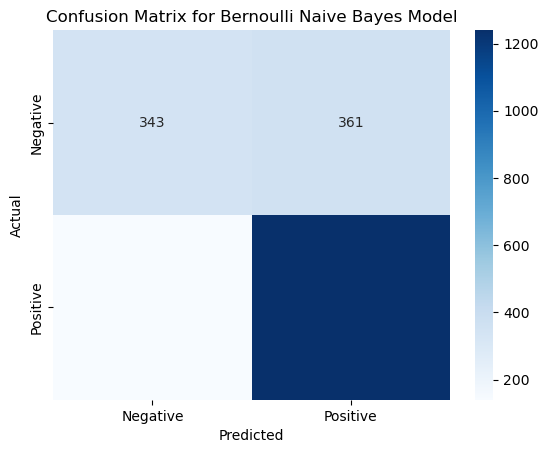

In [46]:
print("Visualizing the confusion matrix for Bernoulli Naive Bayes Model")
sns.heatmap(bn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bernoulli Naive Bayes Model')
plt.show()

## Logistic Regression Model
Applying the Logistic Regression model on the dataset. 

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, lr_y_pred))



Accuracy Score:  0.8709213051823417


### Confusion Matrix Logistic Regression Model

In [51]:
print("Confusion Matrix for Logistic Regression Model")
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

Confusion Matrix for Logistic Regression Model
[[ 557  147]
 [ 122 1258]]


Visualizing the confusion matrix for Logistic Regression Model


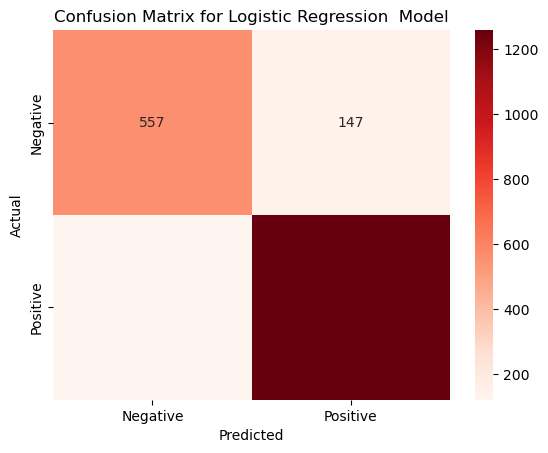

In [52]:
print("Visualizing the confusion matrix for Logistic Regression Model")
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression  Model')
plt.show()

## Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, rf_y_pred))


Accuracy Score:  0.8349328214971209


### Confusion Matrix Random Forest Model

In [57]:
print("Confusion Matrix for Random Forest Model")
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)

Confusion Matrix for Random Forest Model
[[ 405  299]
 [  45 1335]]


Visualizing the confusion matrix for Random Forest Model


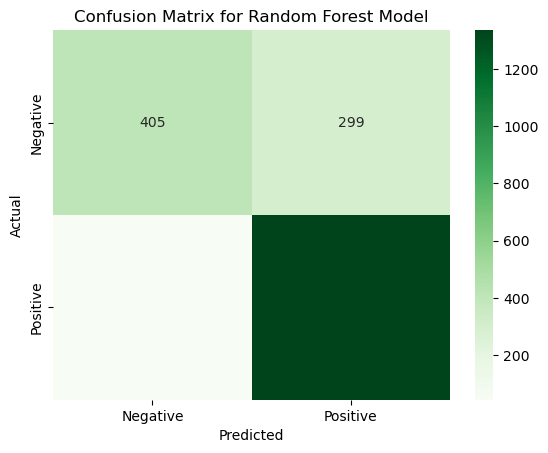

In [58]:
print("Visualizing the confusion matrix for Random Forest Model")
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


## Basic Evaluation Metrics

### Accuracy
The accuracy score is the ratio of correctly predicted observations to the total observations.
#### Accuracy Formula =
    (TP + TN) / (TP + TN + FP + FN)
##### Naive Bayes:          
    [ [ 343  361 ] [ 140 1240 ] ]    (1240 + 343) / (1240 + 343 + 140 + 361) = 0.75
##### Logistic Regression:  
    [ [  557 147 ] [ 122 1258 ] ]    (1258 + 557) / (1258 + 557 + 122 + 147) = 0.87
##### Random Forest:        
    [ [  368 336 ] [ 44 1336 ] ]     (1336 + 368) / (1336 + 368 + 44 + 336) = 0.80

### Precision
It is the ratio of correctly predicted positive observations to the total predicted positives.
#### Precision Formula = 
    TP / (TP + FP)
##### Naive Bayes:          
    343 / (343 + 140) = 0.71
##### Logistic Regression:
    557 / (557 + 122) = 0.82
##### Random Forest:
    368 / (368 + 44) = 0.89
    

### Recall
Recall is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. 
### Recall Formula =
    TP / (TP + FN)
#### Naive Bayes:
    343 / (343 + 361) = 0.49
#### Logistic Regression:
    557 / (557 + 147) = 0.79
#### Random Forest:
    368 / (368 + 336) = 0.52

### F1 Score
The F1 score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

In [65]:
from sklearn.metrics import f1_score
print("F1 Score for Naive Bayes Model: ", f1_score(y_test, bn_y_pred))
print("F1 Score for Logistic Regression Model: ", f1_score(y_test, lr_y_pred))
print("F1 Score for Random Forest Model: ", f1_score(y_test, rf_y_pred))

F1 Score for Naive Bayes Model:  0.8319355920831936
F1 Score for Logistic Regression Model:  0.903411131059246
F1 Score for Random Forest Model:  0.8858659588586596


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

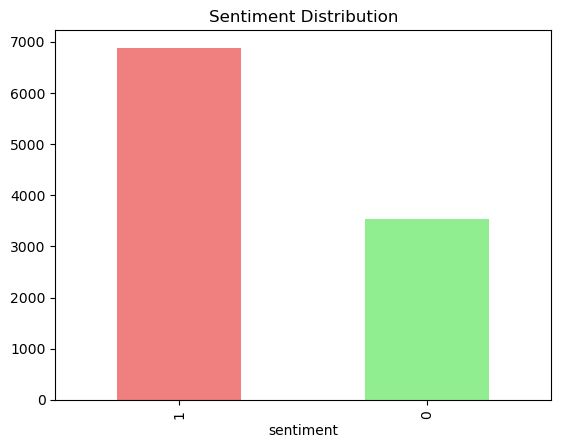

In [66]:
print("Sentiment Distribution")
df.sentiment.value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'], title='Sentiment Distribution')

## Conclusion
* Accuracy is the highest in the Logistic Regression model.
* Precision is the highest in the Random Forest model.
* Recall is the highest in the Logistic Regression model.
* F1 Score is the highest in the Logistic Regression model.

The Logistic Regression model is the best model for this dataset.



## Appendix
### Reuse the trained model and predict the sentiment of the reviews
When new reviews come, we can predict the sentiment of the reviews using the Logistic Regression model.

In [69]:
def predict_sentiment(review):
    review = clean_text(review)
    review = cv.transform([review])
    prediction = lr_model.predict(review)
    if prediction == 1:
        return "Positive"
    else:
        return "Negative"

print("Positive Review: ", predict_sentiment("The food was very delicious and the service was very good."))
print("Negative Review: ", predict_sentiment("The food was very bad and the service was very poor."))


Positive Review:  Positive
Negative Review:  Negative


## References:
* https://en.wikipedia.org/wiki/Natural_language_processing
* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
* https://web.stanford.edu/~jurafsky/slp3/5.pdf
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://data.yelp.com/
* https://www.researchgate.net/profile/Zafer-Acar
* https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning
* https://www.kaggle.com/datasets/farukalam/yelp-restaurant-reviews